In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc

In [4]:
df_eda = pd.read_csv("data/eda_dataset.csv", index_col=0)
df_eda.head()

,inflation_rate,unemployment_rate,exports_percent_gdp,imports_percent_gdp,gross_savings_percent_gdp,education_expenditure_percent_gdp,health_expenditure_percent_gdp,urban_population_percent,manufacturing_percent_gdp,industry_value_added_percent_gdp,medical_doctors,life_expectancy,infant_mortality_rate,probability_of_dying,log_gdp_per_capita,log_manufacturing_value_added_per_capita,log_air_pollution
economy,,,,,,,,,,,,,,,,,
ABW,11.250394,8.891130,74.911679,78.547146,11.515790,3.618558,6.065941,44.068600,7.896325,19.976804,13.056,67.093129,27.003169,21.32,10.262946,19.292636,7.454645
AFE,6.994467,8.066600,25.533585,28.029980,19.890167,4.029726,5.905218,37.912138,10.593986,26.387866,20.038,71.113027,20.804694,19.09,7.323592,25.491343,8.632938
AFG,2.640260,13.018000,14.998950,44.648986,-2.737769,3.275618,18.740391,26.630800,8.438113,14.181612,3.170,60.986038,53.768425,32.70,6.017560,21.038838,8.563518
AFW,4.654425,3.948651,59.056089,52.681848,26.685960,3.150744,3.896020,49.116984,12.557476,28.808897,27.196,72.441723,19.525343,18.78,7.394027,25.345606,8.283791
AGO,22.253144,15.218400,41.833334,26.045728,32.254223,2.465685,2.942555,68.067000,7.460300,45.553859,2.440,64.255839,38.271402,24.70,7.672489,22.480223,8.293849


In [5]:
scaler = StandardScaler()
X_scaled_values = scaler.fit_transform(df_eda)
df_scaled = pd.DataFrame(X_scaled_values, 
                         columns=df_eda.columns, 
                         index=df_eda.index)

df_scaled.describe().T[['mean', 'std']].head()

,mean,std
inflation_rate,0.000000e+00,1.001885
unemployment_rate,1.001705e-17,1.001885
exports_percent_gdp,-6.678033e-18,1.001885
imports_percent_gdp,-2.136971e-16,1.001885
gross_savings_percent_gdp,8.347542e-17,1.001885


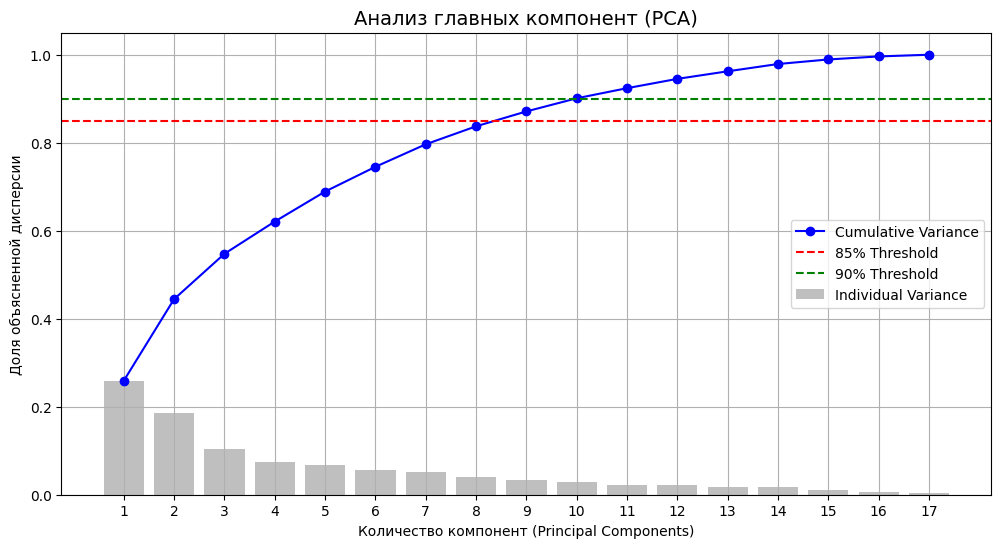

In [ ]:
pca = PCA(random_state=42)
pca.fit(df_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         marker='o', linestyle='-', color='b', label='Cumulative Variance')
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_, 
        alpha=0.5, color='gray', label='Individual Variance')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Threshold')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Threshold')
plt.title('Анализ главных компонент (PCA)', fontsize=14)
plt.xlabel('Количество компонент (Principal Components)')
plt.ylabel('Доля объясненной дисперсии')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.legend(loc='center right')
plt.show()

In [27]:
# 4. Текстовый вывод для принятия решения
print("--- Variance Explained ---")
for i, val in enumerate(cumulative_variance):
    print(f"PC{i+1}: {val:.4f} ({pca.explained_variance_ratio_[i]:.4f})")

--- Variance Explained ---
PC1: 0.2590 (0.2590)
PC2: 0.4446 (0.1855)
PC3: 0.5475 (0.1030)
PC4: 0.6208 (0.0733)
PC5: 0.6890 (0.0682)
PC6: 0.7452 (0.0562)
PC7: 0.7964 (0.0512)
PC8: 0.8373 (0.0408)
PC9: 0.8711 (0.0339)
PC10: 0.9010 (0.0298)
PC11: 0.9240 (0.0230)
PC12: 0.9451 (0.0212)
PC13: 0.9623 (0.0172)
PC14: 0.9789 (0.0166)
PC15: 0.9892 (0.0103)
PC16: 0.9961 (0.0069)
PC17: 1.0000 (0.0039)


In [ ]:
n_components = 10
pca_final = PCA(n_components=n_components, random_state=42)
X_pca = pca_final.fit_transform(df_scaled)
df_pca = pd.DataFrame(X_pca, 
                      columns=[f'PC{i+1}' for i in range(10)], 
                      index=df_scaled.index)

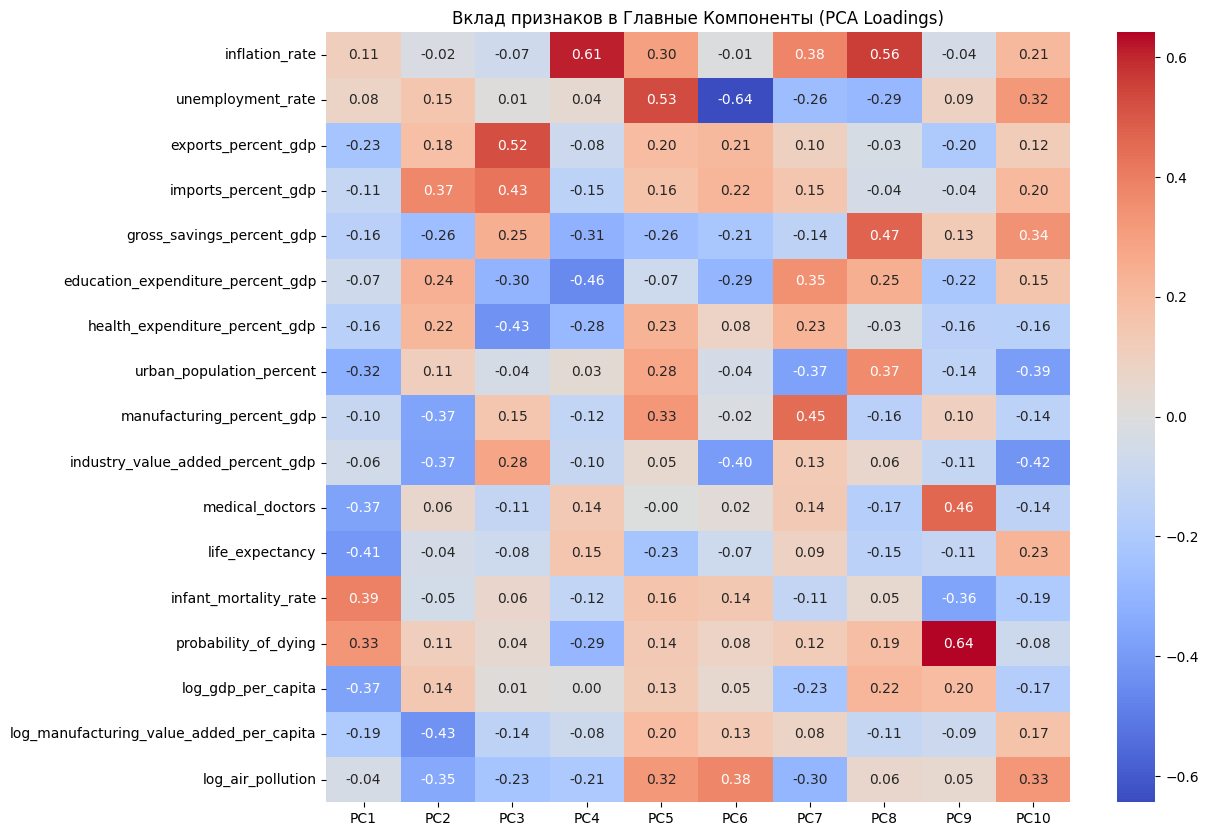

In [29]:
loadings = pd.DataFrame(pca_final.components_.T, 
                        columns=[f'PC{i+1}' for i in range(10)], 
                        index=df_scaled.columns)

plt.figure(figsize=(12, 10))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Вклад признаков в Главные Компоненты (PCA Loadings)')
plt.show()

In [31]:
for i in range(3):
    pc_name = f'PC{i+1}'
    # Сортируем по абсолютному значению вклада
    top_features = loadings[pc_name].abs().sort_values(ascending=False).head(4)
    print(f"{pc_name} определяется через:")
    for feature in top_features.index:
        sign = "+" if loadings.loc[feature, pc_name] > 0 else "-"
        print(f"  {sign} {feature} ({loadings.loc[feature, pc_name]:.2f})")


PC1 определяется через:
  - life_expectancy (-0.41)
  + infant_mortality_rate (0.39)
  - log_gdp_per_capita (-0.37)
  - medical_doctors (-0.37)
PC2 определяется через:
  - log_manufacturing_value_added_per_capita (-0.43)
  - industry_value_added_percent_gdp (-0.37)
  + imports_percent_gdp (0.37)
  - manufacturing_percent_gdp (-0.37)
PC3 определяется через:
  + exports_percent_gdp (0.52)
  - health_expenditure_percent_gdp (-0.43)
  + imports_percent_gdp (0.43)
  - education_expenditure_percent_gdp (-0.30)


In [ ]:
df_pca.to_csv("data/pca_dataset.csv")